In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [29]:
# Load the dataset
file_path = "/content/drive/MyDrive/Concept of AI -- Assement/Regression/Global Electricity Statistics.csv"
df = pd.read_csv(file_path)

**EDA**

In [30]:
# Display rows and column in the dataset
print(f"Shape Of The Dataset: {df.shape}")

Shape Of The Dataset: (1610, 45)


In [53]:
# Strip any whitespace from 'Features' column
df["Features"] = df["Features"].str.strip()

# Drop rows where 'Features' contains unwanted values
df = df[~df["Features"].isin(["imports", "exports", "net consumption", "net imports", "distribution losses", "installed capacity"])]

# Verify removal
print(df["Features"].unique())  # Check remaining unique values
df.tail()  # Show last rows


['net generation']


,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
225,Trinidad and Tobago,net generation,Central & South America,1.95,2.174,2.53,2.746,2.83,2.853,3.136,...,8.58432,8.93494,8.85792,8.9971,8.85516,8.76492,8.6728,8.63802,8.201788516,8.726318981
226,Turks and Caicos Islands,net generation,Central & South America,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.197,0.196,0.21338,0.22466,0.235,0.226164,0.24258,0.245118,0.256,0.27254
227,U.S. Virgin Islands,net generation,Central & South America,0.749,0.791,0.801,0.823,0.827,0.846,0.865,...,0.778801,0.727248,0.700179,0.692274,0.68733,0.52324,0.61,0.619,0.6488,0.6925072
228,Uruguay,net generation,Central & South America,3.262,3.51,3.495,7.258,7.161,6.525,7.344,...,10.61276,11.46676,12.85684,13.6016,13.75942,14.25238,14.50816,16.046935,13.5435,15.82352
229,Venezuela,net generation,Central & South America,32.012,35.957,38.274,41.801,42.645,46.22,48.363,...,118.5113,120.0401,100.35006,119.19668,104.67136,101.203265,97.263875,83.04078,94.23124208,94.74670541


In [54]:
# Drop non-numeric columns
df_numeric = df.drop(columns=["Country", "Features", "Region"], errors='ignore')


# Check the first few rows after removal
df.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [55]:
# Convert all columns to numeric values (handling errors)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handling missing values
df = df.dropna()


Missing values:
Country     0
Features    0
Region      0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64


In [57]:
# Drop rows with missing target values (2021)
df_numeric = df_numeric.dropna(subset=["2021"])

In [58]:
# Define features (X) and target variable (y)
X = df_numeric.drop(columns=["2021"])  # All years except 2021
y = df_numeric["2021"]  # Target variable: 2021 electricity generation

In [59]:
# Display dataset shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (215, 41)
Target shape: (215,)


In [60]:
# Perform summary statistics
print("\nSummary Statistics:")
print(df_numeric.describe())


Summary Statistics:
              1980         1981         1982         1983         1984  \
count   184.000000   184.000000   184.000000   184.000000   184.000000   
mean     33.293047    33.864084    34.212751    35.718886    37.749516   
std     178.674709   179.542360   176.163532   182.082115   190.833604   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.108250     0.106000     0.120250     0.133500     0.131000   
50%       1.133000     1.172000     1.251000     1.251500     1.141500   
75%      11.759500    11.192000    11.624500    12.622250    13.527000   
max    2289.600364  2297.973338  2244.372487  2313.445686  2419.465367   

              1985         1986         1987         1988         1989  ...  \
count   184.000000   185.000000   185.000000   185.000000   185.000000  ...   
mean     39.402826    40.392994    42.379505    44.404665    47.171406  ...   
std     195.745911   197.300207   204.992914   215.316284   234.321582  ...

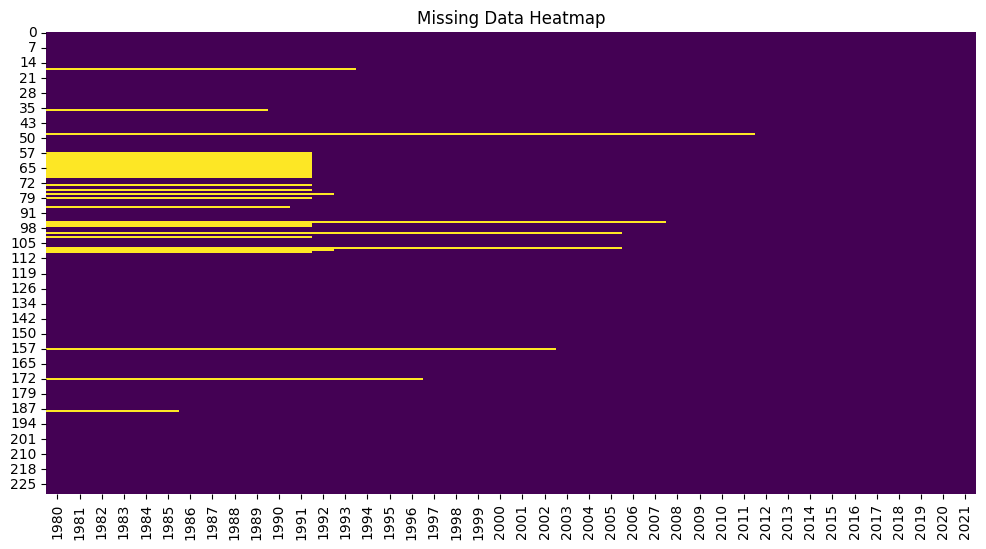

In [61]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


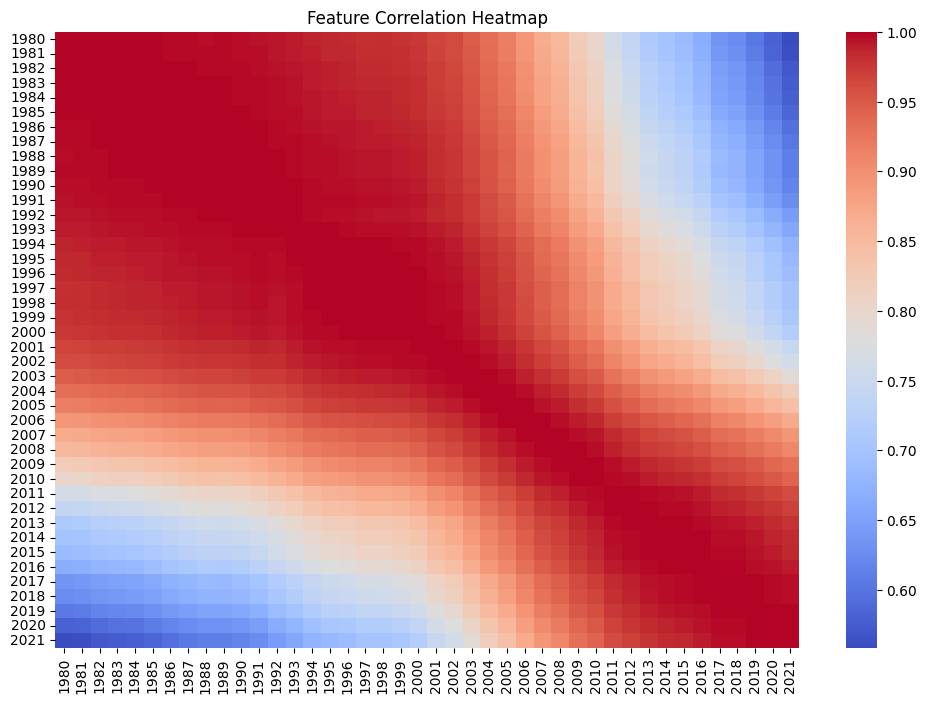

In [62]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

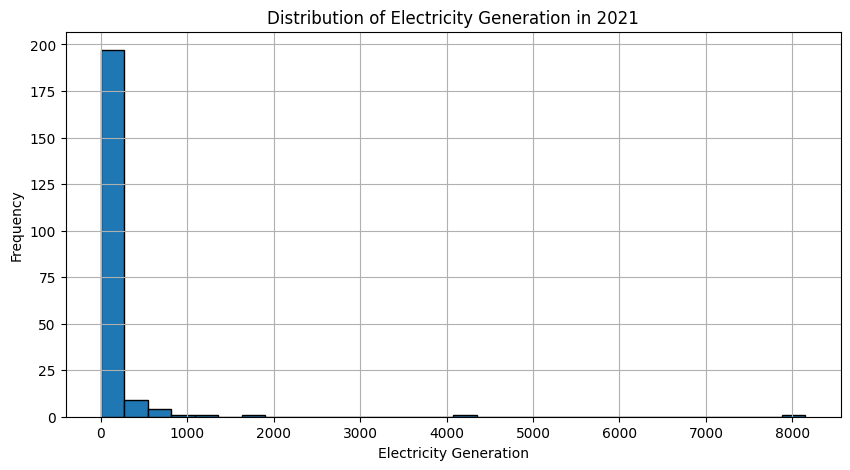

In [63]:
# Distribution of the target variable
y.hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.title("Distribution of Electricity Generation in 2021")
plt.xlabel("Electricity Generation")
plt.ylabel("Frequency")
plt.show()

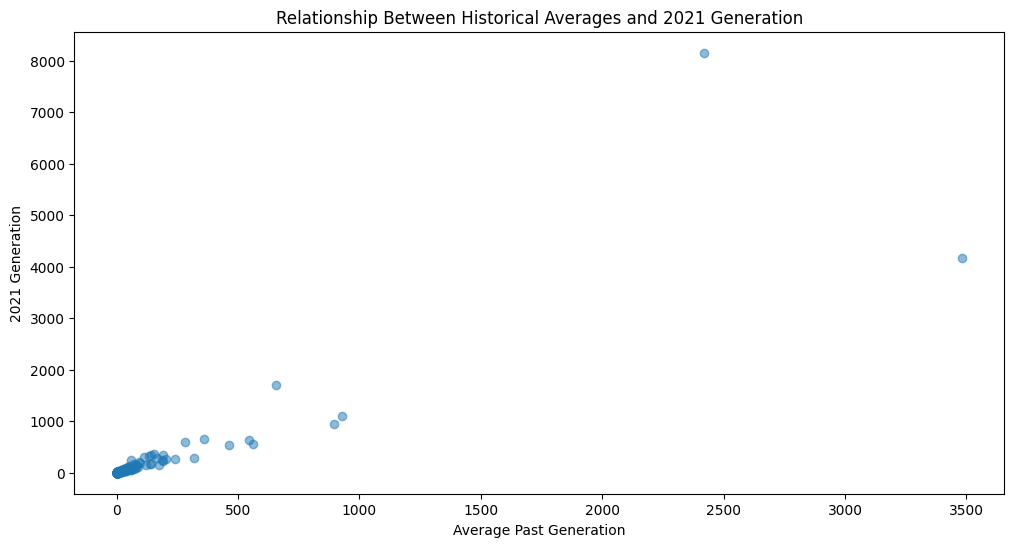

In [64]:
# Scatter plot for trend visualization
plt.figure(figsize=(12, 6))
plt.scatter(X.mean(axis=1), y, alpha=0.5)
plt.title("Relationship Between Historical Averages and 2021 Generation")
plt.xlabel("Average Past Generation")
plt.ylabel("2021 Generation")
plt.show()

**Linear Regression form Scratch**

Train MSE: 2.850111136972388
Test MSE: 149.8039115701744
Train R-squared: 0.9999943793808702
Test R-squared: 0.9950233943760605


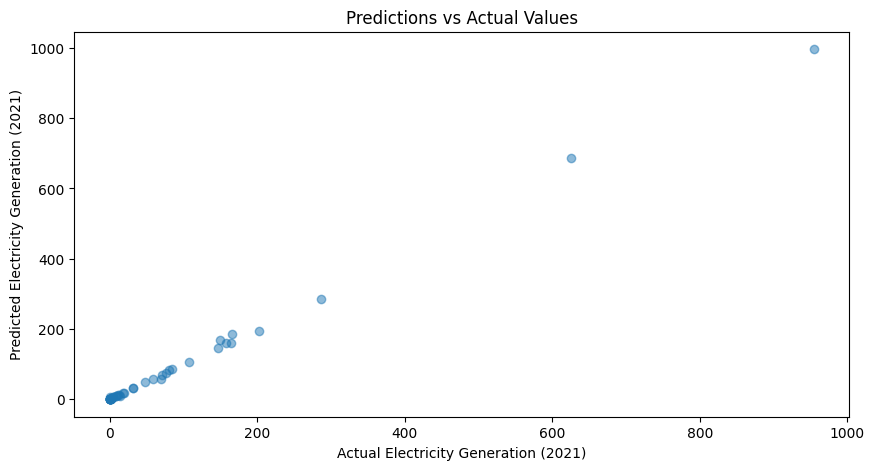

In [ ]:
# Fill missing values with column means
X = X.fillna(X.mean())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Linear Regression from scratch
class LinearRegressionScratch:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept, self.coefficients])

# Train the model
model = LinearRegressionScratch()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Electricity Generation (2021)")
plt.ylabel("Predicted Electricity Generation (2021)")
plt.title("Predictions vs Actual Values")
plt.show()


**Primary Model**

Linear Regression Performance:
MSE: 149.8039144766535
RMSE: 12.239440938076113
MAE: 4.649367175052844
R-squared: 0.9950233942795049

Random Forest Regressor Performance:
MSE: 178084.2229315491
RMSE: 422.00026413682383
MAE: 93.61583402834424
R-squared: -4.916100161115509



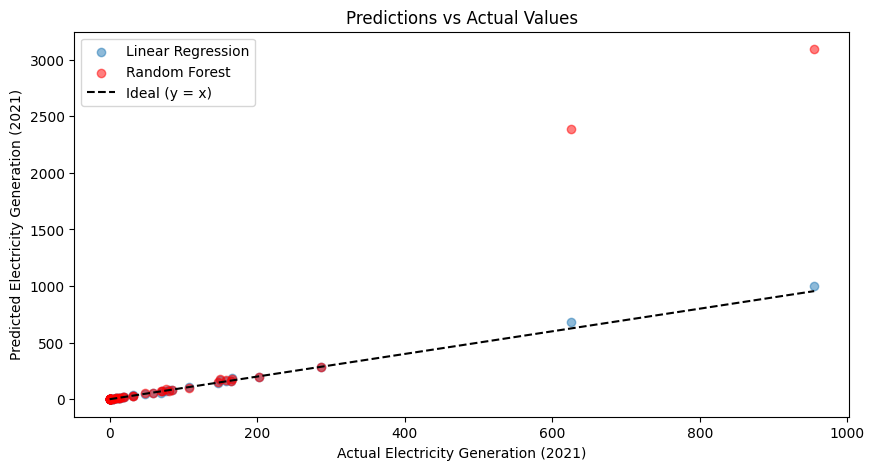

In [66]:

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")

# Print evaluation metrics
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal (y = x)')
plt.xlabel("Actual Electricity Generation (2021)")
plt.ylabel("Predicted Electricity Generation (2021)")
plt.title("Predictions vs Actual Values")
plt.legend()
plt.show()

**Hyper-parameter Optimization with Cross-Validation**

Linear Regression Performance:
MSE: 149.8039144766535
RMSE: 12.239440938076113
MAE: 4.649367175052844
R-squared: 0.9950233942795049

Random Forest Regressor (Default) Performance:
MSE: 178084.2229315491
RMSE: 422.00026413682383
MAE: 93.61583402834424
R-squared: -4.916100161115509

Random Forest Regressor (Tuned) Performance:
MSE: 149884.77887651595
RMSE: 387.149556213766
MAE: 89.9027107532465
R-squared: -3.979292100462798

Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


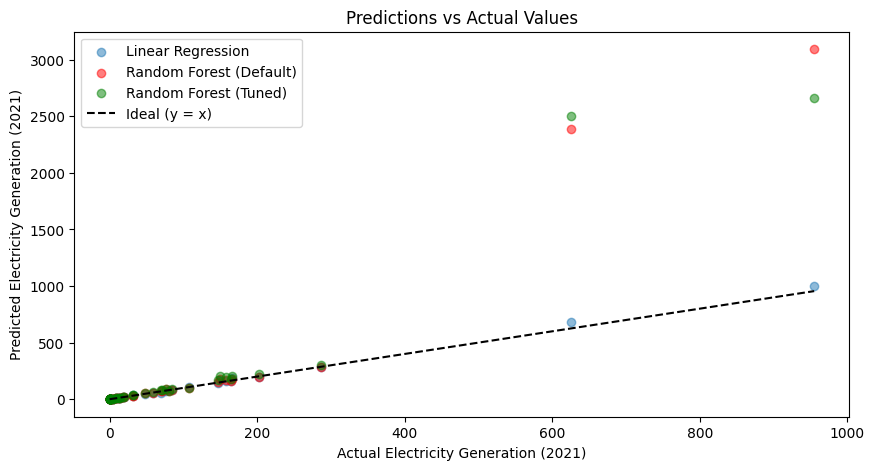

In [67]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")

# Print evaluation metrics
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor (Default)")

y_pred_rf_best = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf_best, "Random Forest Regressor (Tuned)")

# Print best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest (Default)", color='red')
plt.scatter(y_test, y_pred_rf_best, alpha=0.5, label="Random Forest (Tuned)", color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal (y = x)')
plt.xlabel("Actual Electricity Generation (2021)")
plt.ylabel("Predicted Electricity Generation (2021)")
plt.title("Predictions vs Actual Values")
plt.legend()
plt.show()

**Feature Selection**


Feature Importance Ranking:
2020: 276147.3996
2019: 62368.5743
2018: 28187.9231
2017: 20576.8498
2016: 10486.0587
2015: 7441.2515
2014: 6046.9188
2013: 4933.6751
2012: 3369.5650
2011: 2554.0850
2010: 1686.3102
2009: 1350.0958
2008: 1001.6907
2007: 844.2200
2006: 661.9094
2005: 511.9475
2004: 429.3288
2003: 351.1736
2002: 293.2872
2001: 265.5467
2000: 229.2169
1999: 213.4075
1998: 203.6417
1997: 202.9223
1996: 192.1373
1995: 187.0732
1994: 177.2037
1993: 162.4832
1992: 150.8532
1991: 134.4414
1990: 126.8859
1988: 123.7764
1989: 123.1010
1987: 119.3838
1986: 114.3176
1985: 108.2038
1984: 104.1835
1983: 102.4200
1982: 100.2256
1981: 95.8046
1980: 94.1476

Selected Features: ['2016', '2017', '2018', '2019', '2020']
Linear Regression Performance:
MSE: 37.75262053810994
RMSE: 6.144316116388376
MAE: 2.4359750080302347
R-squared: 0.9987458277843406

Random Forest Regressor (Default) Performance:
MSE: 17.01402953373597
RMSE: 4.124806605616313
MAE: 2.105678620576032
R-squared: 0.999434780346013

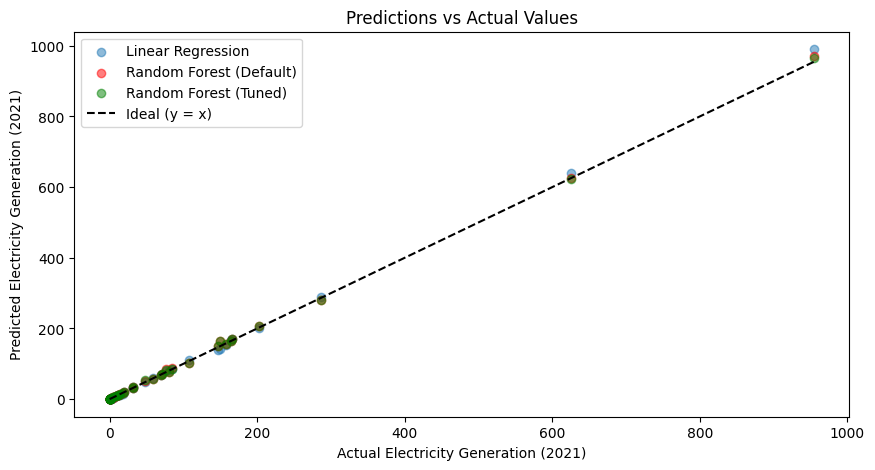

In [ ]:
k = 5  # Select top 5 features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Get feature scores
feature_scores = selector.scores_

# Combine feature names and scores
feature_importance = sorted(zip(feature_scores, X.columns), reverse=True)

# Print feature importance ranking
print("\nFeature Importance Ranking:")
for score, feature in feature_importance:
    print(f"{feature}: {score:.4f}")

print(f"\nSelected Features: {list(selected_features)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")

# Print evaluation metrics
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor (Default)")

y_pred_rf_best = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf_best, "Random Forest Regressor (Tuned)")

# Print best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

# Visualization: Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest (Default)", color='red')
plt.scatter(y_test, y_pred_rf_best, alpha=0.5, label="Random Forest (Tuned)", color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal (y = x)')
plt.xlabel("Actual Electricity Generation (2021)")
plt.ylabel("Predicted Electricity Generation (2021)")
plt.title("Predictions vs Actual Values")
plt.legend()
plt.show()


**Final Model**

Selected Features: ['2016', '2017', '2018', '2019', '2020']
Final Linear Regression Performance:
MSE: 37.75262053810994
RMSE: 6.144316116388376
MAE: 2.4359750080302347
R-squared: 0.9987458277843406

Final Random Forest Regressor Performance:
MSE: 13.188931449238398
RMSE: 3.6316568462945944
MAE: 1.9600846620539434
R-squared: 0.9995618531603343



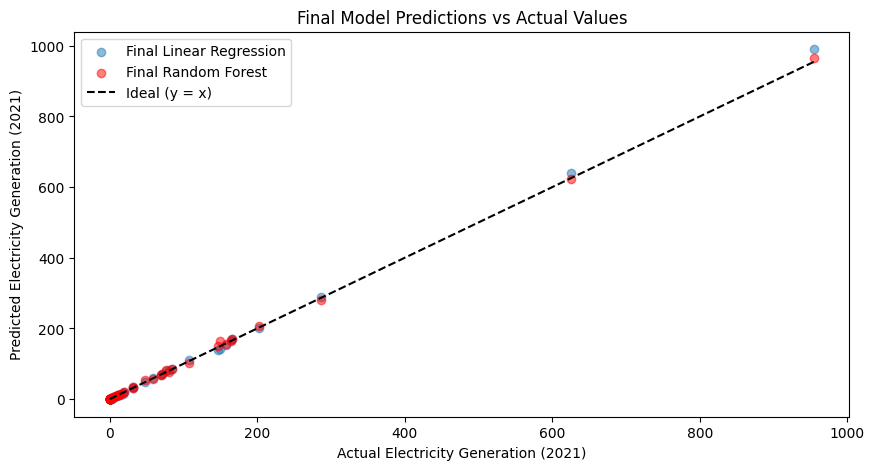

In [70]:
# Feature Selection using SelectKBest
k = 5  # Select top 5 features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Final Linear Regression Model
final_lr_model = LinearRegression()
final_lr_model.fit(X_train, y_train)
y_pred_final_lr = final_lr_model.predict(X_test)

# Train Final Random Forest Regressor Model with Best Hyperparameters
final_rf_model = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train, y_train)
y_pred_final_rf = final_rf_model.predict(X_test)

# Evaluate final models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")

# Print evaluation metrics
evaluate_model(y_test, y_pred_final_lr, "Final Linear Regression")
evaluate_model(y_test, y_pred_final_rf, "Final Random Forest Regressor")

# Visualization: Final Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final_lr, alpha=0.5, label="Final Linear Regression")
plt.scatter(y_test, y_pred_final_rf, alpha=0.5, label="Final Random Forest", color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal (y = x)')
plt.xlabel("Actual Electricity Generation (2021)")
plt.ylabel("Predicted Electricity Generation (2021)")
plt.title("Final Model Predictions vs Actual Values")
plt.legend()
plt.show()
